In [1]:
import numpy as np
import pandas as pd

In [2]:
# filepath = "./data/payment.csv"
filepath = r'D:\DevRoot\DataSet\mysql\sakila\payment.csv'

# 월별 x 일별 매출 개수 와 매출합계

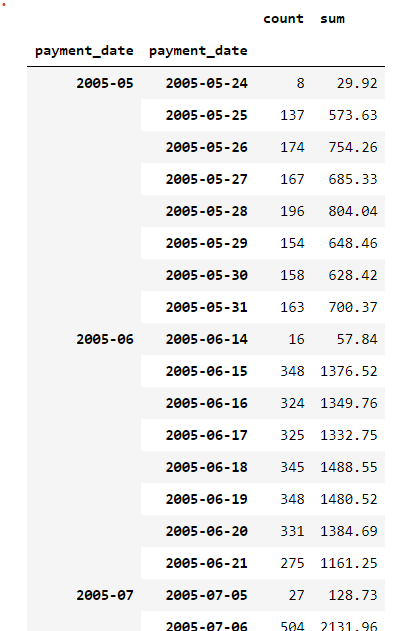

In [3]:
df = pd.read_csv(filepath)
df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16049 entries, 0 to 16048
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   payment_id    16049 non-null  int64  
 1   customer_id   16049 non-null  int64  
 2   staff_id      16049 non-null  int64  
 3   rental_id     16044 non-null  float64
 4   amount        16049 non-null  float64
 5   payment_date  16049 non-null  object 
 6   last_update   16049 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 877.8+ KB


In [5]:
# 1) transform() 사용
# 2) apply() 사용

## 1) transform() 사용

In [9]:
df.payment_date.transform(lambda date : str(date)[:7])

0        2005-05
1        2005-05
2        2005-06
3        2005-06
4        2005-06
          ...   
16044    2005-08
16045    2005-08
16046    2005-08
16047    2005-08
16048    2005-08
Name: payment_date, Length: 16049, dtype: object

In [10]:
df['month'] = df.payment_date.transform(lambda date : str(date)[:7])

In [11]:
df['date'] = df.payment_date.transform(lambda date : str(date)[:10])

In [12]:
df

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update,month,date
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30,2005-05,2005-05-25
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30,2005-05,2005-05-28
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30,2005-06,2005-06-15
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30,2005-06,2005-06-15
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30,2005-06,2005-06-15
...,...,...,...,...,...,...,...,...,...
16044,16045,599,1,14599.0,4.99,2005-08-21 17:43:42,2006-02-15 22:24:12,2005-08,2005-08-21
16045,16046,599,1,14719.0,1.99,2005-08-21 21:41:57,2006-02-15 22:24:12,2005-08,2005-08-21
16046,16047,599,2,15590.0,8.99,2005-08-23 06:09:44,2006-02-15 22:24:12,2005-08,2005-08-23
16047,16048,599,2,15719.0,2.99,2005-08-23 11:08:46,2006-02-15 22:24:13,2005-08,2005-08-23


In [14]:
df.groupby(['month', 'date']).size()

month    date      
2005-05  2005-05-24      8
         2005-05-25    137
         2005-05-26    174
         2005-05-27    167
         2005-05-28    196
         2005-05-29    154
         2005-05-30    158
         2005-05-31    163
2005-06  2005-06-14     16
         2005-06-15    348
         2005-06-16    324
         2005-06-17    325
         2005-06-18    345
         2005-06-19    348
         2005-06-20    331
         2005-06-21    275
2005-07  2005-07-05     27
         2005-07-06    504
         2005-07-07    461
         2005-07-08    512
         2005-07-09    513
         2005-07-10    480
         2005-07-11    461
         2005-07-12    496
         2005-07-26     33
         2005-07-27    649
         2005-07-28    620
         2005-07-29    641
         2005-07-30    635
         2005-07-31    679
2005-08  2005-08-01    671
         2005-08-02    643
         2005-08-16     23
         2005-08-17    593
         2005-08-18    621
         2005-08-19    628
        

In [16]:
df.groupby(['month', 'date']).agg({"amount": ["count", "sum"]})['amount']

count      sum
month   date                      
2005-05 2005-05-24      8    29.92
        2005-05-25    137   573.63
        2005-05-26    174   754.26
        2005-05-27    167   685.33
        2005-05-28    196   804.04
        2005-05-29    154   648.46
        2005-05-30    158   628.42
        2005-05-31    163   700.37
2005-06 2005-06-14     16    57.84
        2005-06-15    348  1376.52
        2005-06-16    324  1349.76
        2005-06-17    325  1332.75
        2005-06-18    345  1488.55
        2005-06-19    348  1480.52
        2005-06-20    331  1384.69
        2005-06-21    275  1161.25
2005-07 2005-07-05     27   128.73
        2005-07-06    504  2131.96
        2005-07-07    461  1943.39
        2005-07-08    512  2210.88
        2005-07-09    513  2075.87
        2005-07-10    480  1939.20
        2005-07-11    461  1938.39
        2005-07-12    496  2106.04
        2005-07-26     33   160.67
        2005-07-27    649  2726.51
        2005-07-28    620  2577.80
        2005-07-29    641  2721.59
        2005-07-30    635  2844.65
        2005-07-31    679  2868.21
2005-08 2005-08-01    671  2817.29
        2005-08-02    643  2726.57
        2005-08-16     23   111.77
        2005-08-17    593  2457.07
        2005-08-18    621  2710.79
        2005-08-19    628  2615.72
        2005-08-20    624  2723.76
        2005-08-21    659  2809.41
        2005-08-22    626  2576.74
        2005-08-23    599  2523.01
2006-02 2006-02-14    182   514.18

## 2. apply () 사용

In [19]:
date = df.payment_date.apply(lambda date : str(date)[:10])
date

0        2005-05-25
1        2005-05-28
2        2005-06-15
3        2005-06-15
4        2005-06-15
            ...    
16044    2005-08-21
16045    2005-08-21
16046    2005-08-23
16047    2005-08-23
16048    2005-08-23
Name: payment_date, Length: 16049, dtype: object

In [21]:
month = df.payment_date.apply(lambda date : str(date)[:7])
month

0        2005-05
1        2005-05
2        2005-06
3        2005-06
4        2005-06
          ...   
16044    2005-08
16045    2005-08
16046    2005-08
16047    2005-08
16048    2005-08
Name: payment_date, Length: 16049, dtype: object

In [25]:
# 위에서 만든 month, date 두개의 Series 를 groupby 에 넣는다!

# df.groupby([month, date]).size()
df.groupby([month, date]).agg({"amount": ["count", "sum"]})['amount']

count      sum
payment_date payment_date                
2005-05      2005-05-24        8    29.92
             2005-05-25      137   573.63
             2005-05-26      174   754.26
             2005-05-27      167   685.33
             2005-05-28      196   804.04
             2005-05-29      154   648.46
             2005-05-30      158   628.42
             2005-05-31      163   700.37
2005-06      2005-06-14       16    57.84
             2005-06-15      348  1376.52
             2005-06-16      324  1349.76
             2005-06-17      325  1332.75
             2005-06-18      345  1488.55
             2005-06-19      348  1480.52
             2005-06-20      331  1384.69
             2005-06-21      275  1161.25
2005-07      2005-07-05       27   128.73
             2005-07-06      504  2131.96
             2005-07-07      461  1943.39
             2005-07-08      512  2210.88
             2005-07-09      513  2075.87
             2005-07-10      480  1939.20
             2005-07-11      461  1938.39
             2005-07-12      496  2106.04
             2005-07-26       33   160.67
             2005-07-27      649  2726.51
             2005-07-28      620  2577.80
             2005-07-29      641  2721.59
             2005-07-30      635  2844.65
             2005-07-31      679  2868.21
2005-08      2005-08-01      671  2817.29
             2005-08-02      643  2726.57
             2005-08-16       23   111.77
             2005-08-17      593  2457.07
             2005-08-18      621  2710.79
             2005-08-19      628  2615.72
             2005-08-20      624  2723.76
             2005-08-21      659  2809.41
             2005-08-22      626  2576.74
             2005-08-23      599  2523.01
2006-02      2006-02-14      182   514.18

In [ ]:
# TODO